In [1]:
import os
import pandas as pd

import torch
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [3]:
model_name, layer_name = [], []
number = []
skews, kurts = [], []
mins, maxs = [], []
means, stds = [], []
category = []
gs_1, gs_2, gs_3, gs_4 = [], [], [], []
DIR = 'engine/'
for fname in os.listdir(DIR):
    params = torch.load(DIR+fname)
    for x in params.keys():
        if ('weight' in x) and ('conv' in x):
            series = pd.Series(params[x].cpu().numpy().flatten())
            model_name.append(fname)
            layer_name.append(x)
            number.append(np.prod(params[x].shape))
            skews.append(series.skew())
            kurts.append(series.kurt())
            mins.append(series.min())
            maxs.append(series.max())
            means.append(series.mean())
            stds.append(series.std())
#             gmm = GaussianMixture(n_components=4)
#             gmm = gmm.fit(params[x].cpu().numpy().flatten().reshape(-1,1))
#             tmp = list(gmm.means_.flatten()) + list(gmm.covariances_.flatten())
#             gauss.append(tmp)
            if 'sgn' in fname:
                category.append(0)
            elif 'cor' in fname:
                category.append(1)
            else:
                category.append(2)

In [4]:
len(model_name)

316

In [5]:
df = pd.DataFrame({'model_name':model_name, 'layer_name':layer_name, 'number':number, 
                                'skew':skews, 'kurt':kurts,  'means':means, 'std': stds, 'category':category})
df.head()

,model_name,layer_name,number,skew,kurt,means,std,category
0,cifar_cor_res5_16.0_model.ckpt,conv1.weight,432,-0.730121,2.780416,0.017492,0.083001,1
1,cifar_cor_res5_16.0_model.ckpt,layers_2n.0.conv1.weight,2304,-0.310040,-0.896131,-0.034808,0.110399,1
2,cifar_cor_res5_16.0_model.ckpt,layers_2n.0.conv2.weight,2304,-0.656844,0.449128,0.038599,0.077041,1
3,cifar_cor_res5_16.0_model.ckpt,layers_2n.1.conv1.weight,2304,-0.126985,-0.683423,0.010912,0.080267,1
4,cifar_cor_res5_16.0_model.ckpt,layers_2n.1.conv2.weight,2304,0.188671,-0.848721,-0.025959,0.095376,1


In [6]:
import seaborn as sns

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import *
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
# 构建要使用的模型
clf = clf=svm.SVC(gamma='auto')

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=500, learning_rate=0.3)

model = XGBClassifier()  
log_reg=LogisticRegression() 
log_reg1=LogisticRegression(multi_class="multinomial",solver="newton-cg")
rfc = RandomForestClassifier()

In [9]:
X = df[[ 'skew', 'kurt', 'means', 'number', 'std']].values
Y = df['category'].values
accs = []
f1_scores = []
subs = []

# for point in range(50,200):
point = 210
if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
    rfc.fit(X[:point],Y[:point])
    pred_ok = sum(rfc.predict(X[point:]) == Y[point:])
#     acc = pred_ok / len(Y[point:])
    acc = accuracy_score(rfc.predict(X[point:]), Y[point:])
    f1 = f1_score(rfc.predict(X[point:]), Y[point:], average='micro')
    precision = precision_score(rfc.predict(X[point:]), Y[point:], average='micro')
    recall = recall_score(rfc.predict(X[point:]), Y[point:], average='micro')
print("accs:", acc) 
print("precision:", precision)
print("recall:", recall)
print("f1_scores", f1)


accs: 0.9339622641509434
precision: 0.9339622641509434
recall: 0.9339622641509434
f1_scores 0.9339622641509434


/root/miniconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
X = df[[ 'skew', 'kurt', 'means', 'number', 'std']].values
Y = df['category'].values
accs = []
f1_scores = []
subs = []

# for point in range(50,200):
point = 210
if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
    log_reg1.fit(X[:point],Y[:point])
    pred_ok = sum(log_reg1.predict(X[point:]) == Y[point:])
#     acc = pred_ok / len(Y[point:])
    acc = accuracy_score(log_reg1.predict(X[point:]), Y[point:])
    f1 = f1_score(log_reg1.predict(X[point:]), Y[point:], average='micro')
    precision = precision_score(log_reg1.predict(X[point:]), Y[point:], average='micro')
    recall = recall_score(log_reg1.predict(X[point:]), Y[point:], average='micro')
print("accs:", acc) 
print("precision:", precision)
print("recall:", recall)
print("f1_scores", f1)


accs: 0.9339622641509434
precision: 0.9339622641509434
recall: 0.9339622641509434
f1_scores 0.9339622641509434


/root/miniconda3/envs/pytorch/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/root/miniconda3/envs/pytorch/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/root/miniconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [11]:
X = df[[ 'skew', 'kurt', 'means', 'number', 'std']].values
Y = df['category'].values
accs = []
f1_scores = []
subs = []

# for point in range(50,200):
point = 210
if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
    clf.fit(X[:point],Y[:point])
    pred_ok = sum(clf.predict(X[point:]) == Y[point:])
#     acc = pred_ok / len(Y[point:])
    acc = accuracy_score(clf.predict(X[point:]), Y[point:])
    f1 = f1_score(clf.predict(X[point:]), Y[point:], average='micro')
    precision = precision_score(clf.predict(X[point:]), Y[point:], average='micro')
    recall = recall_score(clf.predict(X[point:]), Y[point:], average='micro')
print("accs:", acc) 
print("precision:", precision)
print("recall:", recall)
print("f1_scores", f1)


accs: 0.9528301886792453
precision: 0.9528301886792453
recall: 0.9528301886792453
f1_scores 0.9528301886792453


In [12]:
import sys

# for point in range(50,200):
point = 210
if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
    bdt.fit(X[:point],Y[:point])
    pred_ok = sum(bdt.predict(X[point:]) == Y[point:])
    acc = pred_ok / len(Y[point:])
    f1 = f1_score(bdt.predict(X[point:]), Y[point:], average='micro')
    precision = precision_score(bdt.predict(X[point:]), Y[point:], average='micro')
    recall = recall_score(bdt.predict(X[point:]), Y[point:], average='micro')
print("accs:", acc)
print("precision:", precision)
print("recall:", recall)
print("f1_scores", f1)
x = pd.Series({'acc': acc, 'precision': precision, 'recall': recall, 'fl_score': f1})
x.to_latex(sys.stdout)

accs: 0.9339622641509434
precision: 0.9339622641509434
recall: 0.9339622641509434
f1_scores 0.9339622641509434
\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
acc       &  0.933962 \\
precision &  0.933962 \\
recall    &  0.933962 \\
fl\_score  &  0.933962 \\
\bottomrule
\end{tabular}


In [13]:
import sys

# for point in range(50,200):
point = 210
if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
    bdt.fit(X[:point],Y[:point])
    pred_ok = sum(bdt.predict(X[point:]) == Y[point:])
    acc = pred_ok / len(Y[point:])
    f1 = f1_score(bdt.predict(X[point:]), Y[point:], average='macro')
    precision = precision_score(bdt.predict(X[point:]), Y[point:], average='macro')
    recall = recall_score(bdt.predict(X[point:]), Y[point:], average='macro')
print("accs:", acc) 
print("precision:", precision)
print("recall:", recall)
print("f1_scores", f1)
x = pd.Series({'acc': acc, 'precision': precision, 'recall': recall, 'fl_score': f1})
x.to_latex(sys.stdout)

accs: 0.9339622641509434
precision: 0.890818858560794
recall: 0.8737373737373737
f1_scores 0.8794191102381035
\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
acc       &  0.933962 \\
precision &  0.890819 \\
recall    &  0.873737 \\
fl\_score  &  0.879419 \\
\bottomrule
\end{tabular}


In [14]:
import lightgbm as lgb

params={
    'learning_rate':0.1,
    'lambda_l1':0.1,
    'lambda_l2':0.2,
    'max_depth':4,
    'objective':'multiclass',
    'verbose' : 0,
    'num_class':3,  #lightgbm.basic.LightGBMError: b‘Number of classes should be specified and greater than 1 for multiclass training‘
}

points = 210
if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
    subs.append(point)
    lgb_train = lgb.Dataset(X[:point], Y[:point])
    lgb_eval = lgb.Dataset(X[point:], Y[point:], reference=lgb_train)
#         bdt.fit(X[:point],Y[:point])
    # 模型训练
    gbm = lgb.train(params, lgb_train, num_boost_round=20, valid_sets=lgb_eval, early_stopping_rounds=5)
    y_pred = gbm.predict(X[point:], num_iteration=gbm.best_iteration)
    print('y:', [list(x).index(max(x)) for x in y_pred])
    y_pred = [list(x).index(max(x)) for x in y_pred]
    pred_ok = sum(y_pred == Y[point:])
    accs = pred_ok / len(Y[point:])
    f1 = f1_score(y_pred, Y[point:], average='micro')
    precision = precision_score(y_pred, Y[point:], average='micro')
    recall = recall_score(y_pred, Y[point:], average='micro')
print('acc:', accs)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

[1]	valid_0's multi_logloss: 0.869371
Training until validation scores don't improve for 5 rounds
[2]	valid_0's multi_logloss: 0.787592
[3]	valid_0's multi_logloss: 0.718912
[4]	valid_0's multi_logloss: 0.659728
[5]	valid_0's multi_logloss: 0.609698
[6]	valid_0's multi_logloss: 0.565679
[7]	valid_0's multi_logloss: 0.526739
[8]	valid_0's multi_logloss: 0.493097
[9]	valid_0's multi_logloss: 0.46519
[10]	valid_0's multi_logloss: 0.44006
[11]	valid_0's multi_logloss: 0.419398
[12]	valid_0's multi_logloss: 0.400077
[13]	valid_0's multi_logloss: 0.384007
[14]	valid_0's multi_logloss: 0.368002
[15]	valid_0's multi_logloss: 0.356243
[16]	valid_0's multi_logloss: 0.343096
[17]	valid_0's multi_logloss: 0.333208
[18]	valid_0's multi_logloss: 0.320351
[19]	valid_0's multi_logloss: 0.312036
[20]	valid_0's multi_logloss: 0.301207
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.301207
y: [2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [15]:
len(X)

316

0.9615384615384616 212


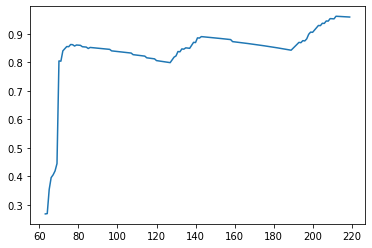

In [16]:
clf = clf=svm.SVC(gamma='auto')
X = df[[ 'skew', 'kurt', 'means', 'number']].values
Y = df['category'].values
accs = []
f1_scores = []
subs = []

for point in range(50,300):
    if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
        subs.append(point)
        clf.fit(X[:point],Y[:point])
        pred_ok = sum(clf.predict(X[point:]) == Y[point:])
        accs.append(pred_ok / len(Y[point:]))
        f1_scores.append(f1_score(clf.predict(X[point:]), Y[point:], average='micro'))
print(max(f1_scores), subs[f1_scores.index(max(f1_scores))])
plt.plot(subs,f1_scores)

50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0.9067796610169492
[(63, 0.36363636363636365), (64, 0.42857142857142855), (65, 0.44621513944223107), (66, 0.788), (67, 0.783132530120482), (68, 0.9032258064516129), (69, 0.9028340080971661), (70, 0.9024390243902439), (71, 0.9020408163265307), (72, 0.9016393442622952), (73, 0.9012345679012346), (74, 0.8966942148760331), (75, 0.8962655601659751), (76, 0.8958333333333334), (77, 0.899581589958159), (78, 0.8991596638655462), (79, 0.8987341772151899), 

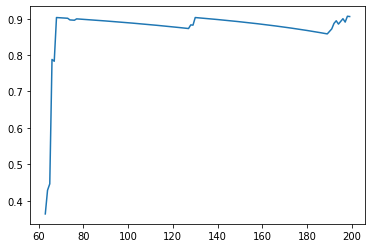

In [17]:
accs = []
f1_scores = []
subs = []
from xgboost import XGBClassifier
model = XGBClassifier()      
for point in range(50,200):
    print(point)
    if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
        subs.append(point)
        model.fit(X[:point],Y[:point])
        pred_ok = sum(model.predict(X[point:]) == Y[point:])
        accs.append(pred_ok / len(Y[point:]))
        f1_scores.append(f1_score(model.predict(X[point:]), Y[point:], average='micro'))
print(max(f1_scores))
plt.plot(subs,f1_scores)
print(list(zip(subs, f1_scores)))

[1]	valid_0's multi_logloss: 2.8681
Training until validation scores don't improve for 5 rounds
[2]	valid_0's multi_logloss: 2.80833
[3]	valid_0's multi_logloss: 2.81013
[4]	valid_0's multi_logloss: 2.76326
[5]	valid_0's multi_logloss: 2.77356
[6]	valid_0's multi_logloss: 2.73261
[7]	valid_0's multi_logloss: 2.7386
[8]	valid_0's multi_logloss: 2.75132
[9]	valid_0's multi_logloss: 2.71502
[10]	valid_0's multi_logloss: 2.72809
[11]	valid_0's multi_logloss: 2.7381
[12]	valid_0's multi_logloss: 2.70836
[13]	valid_0's multi_logloss: 2.72296
[14]	valid_0's multi_logloss: 2.73791
[15]	valid_0's multi_logloss: 2.7149
[16]	valid_0's multi_logloss: 2.72256
[17]	valid_0's multi_logloss: 2.73083
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 2.70836
y: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

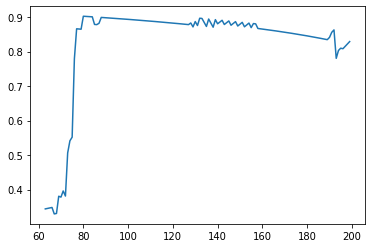

In [18]:
import lightgbm as lgb

# 参数
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # 设置提升类型
#     'objective': 'regression',  # 目标函数
#     'metric': {'l2', 'auc'},  # 评估函数
#     'num_leaves': 31,  # 叶子节点数
#     'learning_rate': 0.05,  # 学习速率
#     'feature_fraction': 0.9,  # 建树的特征选择比例
#     'bagging_fraction': 0.8,  # 建树的样本采样比例
#     'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
#     'num_class': 3,
#     'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
# }

params={
    'learning_rate':0.1,
    'lambda_l1':0.1,
    'lambda_l2':0.2,
    'max_depth':4,
    'objective':'multiclass',
    'num_class':3,  #lightgbm.basic.LightGBMError: b‘Number of classes should be specified and greater than 1 for multiclass training‘
}

accs = []
f1_scores = []
subs = []
for point in range(50,200):
    if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
        subs.append(point)
        lgb_train = lgb.Dataset(X[:point], Y[:point])
        lgb_eval = lgb.Dataset(X[point:], Y[point:], reference=lgb_train)
#         bdt.fit(X[:point],Y[:point])
        # 模型训练
        gbm = lgb.train(params, lgb_train, num_boost_round=20, valid_sets=lgb_eval, early_stopping_rounds=5)
        y_pred = gbm.predict(X[point:], num_iteration=gbm.best_iteration)
        print('y:', [list(x).index(max(x)) for x in y_pred])
        y_pred = [list(x).index(max(x)) for x in y_pred]
        pred_ok = sum(y_pred == Y[point:])
        accs.append(pred_ok / len(Y[point:]))
        f1_scores.append(f1_score(y_pred, Y[point:], average='micro'))
print(max(f1_scores))
plt.plot(subs,f1_scores)
print(list(zip(subs, f1_scores)))

50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
0.9626168224299065
[(63, 0.3596837944664032), (64, 0.35714285714285715), (65, 0.8286852589641436), (66, 0.844), (67, 0.7751004016064257), (68, 0.8548387096774194), (69, 0.8259109311740891), (70, 0.8252032520325203), (71, 0.8571428571428571), (72, 0.889344262295082), (73, 0.8888888888888888), (74, 0.8925619834710744), (75, 0.8921161825726142), (76, 0.8875), (77, 0.8870292887029289), (78, 0.8865546218487395), (79, 0.8860759493670886), (80, 0.8898305084745762), (81, 0.8893617021276594), (82, 0.8888888888888888), (83, 0.8884120171673819), (84, 0.8879310344827587), (85, 0.8831168831168831), (86, 0.8826086956521739), (87, 0.8820960698689956), (88, 0.881578947368421), (89, 0.8810572687224669), (90, 0.8849557522123894), (91, 0.88), (92, 0.8794642857142857), (93, 0.8789237668161435), (94, 0.8783783783783784), (95, 0.8778280542986425), (96, 0.8818181818181818), (97, 0.8812785388127854), (98, 0.88073394

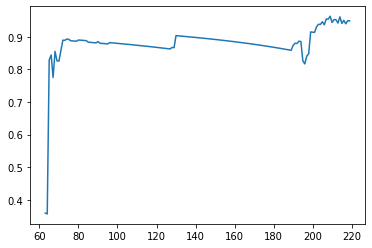

In [19]:
accs = []
f1_scores = []
subs = []
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=500, learning_rate=0.3)
for point in range(50,300):
    if point % 10 == 0:
        print(point)
    if len(set(Y[point:])) == 3 and len(set(Y[:point])) == 3:
        subs.append(point)
        bdt.fit(X[:point],Y[:point])
        pred_ok = sum(bdt.predict(X[point:]) == Y[point:])
        accs.append(pred_ok / len(Y[point:]))
        f1_scores.append(f1_score(bdt.predict(X[point:]), Y[point:], average='micro'))
print(max(f1_scores))
plt.plot(subs,f1_scores)
print(list(zip(subs, f1_scores)))

In [20]:
x = df[df['category'] == 0]['sharpe'].values
y = df[df['category'] == 0]['pos'].values
print(list(zip(x,y)))

KeyError: 'sharpe'

In [ ]:
x = df[df['category'] == 1]['sharpe'].values
y = df[df['category'] == 1]['pos'].values
print(list(zip(x,y)))

In [ ]:
x = df[df['category'] == 2]['sharpe'].values
print(x)

In [ ]:
print(list(df[df['category'] == 0]['heights'] / df[df['category'] == 0]['number']) )

In [ ]:
print(list(df[df['category'] == 1]['heights'] / df[df['category'] == 1]['number']))

In [ ]:
print(list(df[df['category'] == 2]['heights'] / df[df['category'] == 2]['number']))

In [ ]:
x0 = list(df[df['category'] == 0]['heights'] / df[df['category'] == 0]['number'])
x1 = list(df[df['category'] == 1]['heights'] / df[df['category'] == 1]['number'])
x2 = list(df[df['category'] == 2]['heights'] / df[df['category'] == 2]['number'])

In [ ]:
min(x0), max(x0)

In [ ]:
min(x1), max(x1)

In [ ]:
min(x2), max(x2)

In [ ]:
y0 = list(df[df['category'] == 0]['sharpe'] / df[df['category'] == 0]['number'])
y1 = list(df[df['category'] == 1]['sharpe'] / df[df['category'] == 1]['number'])
y2 = list(df[df['category'] == 2]['sharpe'] / df[df['category'] == 2]['number'])

In [ ]:
min(y0), max(y0)

In [ ]:
min(y1), max(y1)

In [ ]:
min(y2), max(y2)